# Summary

In this small projects gun deaths in the U.S.A are investigated.
The gun deaths per year are nearly constant from 2012 to 2014.
The gun death by mont has a low in February and peaks in July. 
Some speculations can be done why this is the case.
More males than females are killed by guns. 
Social support actions tailored to males could be justified therefore.
At some point the gun death data set is matched with the census data set.
The census data allows to understand the ethnic connection of gun deaths.
Have some ethnics groups unproportional higher gun deaths than other groups?
The ethnic group 'black' have unproportional 
higher number of gun deaths and homicides.
Social politics could address this with support programs to reduce the numbers 
of people belonging to the "black" group suffering from gun death within a time frame.

# Import packages

In [235]:
import pandas as pd
print(pd.__version__)

0.24.2


# Import data

In [236]:
import csv
f = open("guns.csv", "r")
csv_file = csv.reader(f)
data = list(csv_file)
print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


In [237]:
headers=data[0]
print(headers)
data=data[1:len(data)]
print(data[:5])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


# Explore & clean data

## Variable: years

In [238]:
# count number of occurences per year
years=[i[1] for i in data]
print(years[:4])
years_set = set(years)
print(years_set)
year_counts={}
for i in years:
    if i in year_counts.keys():
        year_counts[i] += 1
    else:
        year_counts[i] = 1
print(year_counts)
 

['2012', '2012', '2012', '2012']
{'2013', '2014', '2012'}
{'2012': 33563, '2013': 33636, '2014': 33599}


In [239]:
        
from matplotlib import pyplot as plt
%matplotlib inline

year_counts_name = list(year_counts.keys())
year_counts_values = year_counts.values()
year_counts_range = range(len(year_counts))



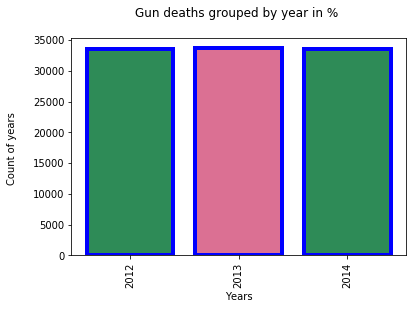

In [240]:
plt.bar(year_counts_name , year_counts_values, 
        tick_label=year_counts_name, align='center',
       color=('seagreen', 'palevioletred'), edgecolor='blue',
    linewidth=4)
plt.xticks(rotation=90)
plt.title('Gun deaths grouped by year in % \n')
plt.xlabel('Years')
plt.ylabel('Count of years \n')
plt.show()

The gun deaths per year are nearly constant.

### Time series: gun death by months

In [241]:
# exploring variable month
months = [i[2] for i in data]
print(months[:5])
# what are the unique values of the variable months
months_set= set(months)
print(months_set)
# all months are included: okay
# count gun deaths per months, meaning count row per month
gundeaths_month = {}
for i in data:
    if i[2] in gundeaths_month.keys():
        gundeaths_month[i[2]] += 1
    else:
        gundeaths_month[i[2]] = 1

print(gundeaths_month)

['01', '01', '01', '02', '02']
{'07', '04', '08', '09', '03', '02', '05', '12', '06', '11', '01', '10'}
{'01': 8273, '02': 7093, '03': 8289, '04': 8455, '05': 8669, '06': 8677, '07': 8989, '08': 8783, '09': 8508, '10': 8406, '11': 8243, '12': 8413}


In [242]:
gundeaths_month_list = [(k, v) for k,v in gundeaths_month.items()]
print(gundeaths_month_list[:10])
gundeaths_month_list_sorted = sorted(gundeaths_month_list)
print(gundeaths_month_list_sorted[:10])

    

[('01', 8273), ('02', 7093), ('03', 8289), ('04', 8455), ('05', 8669), ('06', 8677), ('07', 8989), ('08', 8783), ('09', 8508), ('10', 8406)]
[('01', 8273), ('02', 7093), ('03', 8289), ('04', 8455), ('05', 8669), ('06', 8677), ('07', 8989), ('08', 8783), ('09', 8508), ('10', 8406)]


['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]


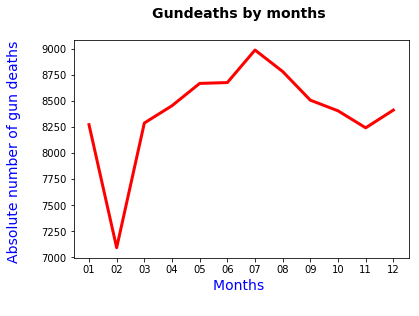

In [243]:
x_gundeaths_month = []
y_gundeaths_month = []
for row in gundeaths_month_list_sorted:
    x_gundeaths_month.append(row[0])
    y_gundeaths_month.append(row[1])

print(x_gundeaths_month)
print(y_gundeaths_month)

plt.plot(x_gundeaths_month, y_gundeaths_month, linestyle='solid', linewidth=3.0, color="red")
plt.title("Gundeaths by months \n", fontsize=14, color='black', weight = 'bold')
plt.xlabel("Months \n",  fontsize=14, color='blue')
plt.ylabel("Absolute number of gun deaths \n", fontsize=14, color='blue')
plt.show()


The gun death by mont has a low in February and peaks in July. Speculation: because it is cold in Feburary people are less outside and are less likely to be killed outside. Further investigation: this makes sense for homicides to a degree but does it also for suicide? Also temperature for the southern region are in February also higher. A separation by "cold" and "hot" southern region could help to understand this. The differentitation between northern and southern region is not in the data set and has to be constructed with other sources if possible.


In [244]:
import datetime
dates = [datetime.datetime(year=int(i[1]), month=int(i[2]), day=1) for i in data]
print(dates[:5])
len(dates)
print(dates[90000:90005])
date_counts = {}
for date in dates:
    if date in date_counts.keys():
        date_counts[date] += 1
    else:
        date_counts[date] = 1
print(len(date_counts))

counter_5=0
for key, value in date_counts.items():
    print(key, value)
    counter_5+=1
    if counter_5 > 5:
        break

[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 2, 1, 0, 0), datetime.datetime(2012, 2, 1, 0, 0)]
[datetime.datetime(2014, 9, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0)]
36
2012-01-01 00:00:00 2758
2012-02-01 00:00:00 2357
2012-03-01 00:00:00 2743
2012-04-01 00:00:00 2795
2012-05-01 00:00:00 2999
2012-06-01 00:00:00 2826


In [245]:
print(headers)

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']


## Variable: sex

In [246]:
# sex: 5
sex_column = []
for i in data:
    sex_column.append(i[5])
print(sex_column[:5])
# sex_column.remove('sex')    
# sex has only 1 element and is removed

['M', 'F', 'M', 'M', 'M']


In [247]:
sex_column_set = set(sex_column)
print(sex_column_set)

sex_column_2 = [i[5] for i in data]
# sex_column_2.remove('sex')

print(sex_column_2[:5])

sex_counts={}
for sex in sex_column_2:
    if sex in sex_counts.keys():
        sex_counts[sex] += 1
    else:
        sex_counts[sex] = 1

print(sex_counts.items())


{'F', 'M'}
['M', 'F', 'M', 'M', 'M']
dict_items([('M', 86349), ('F', 14449)])


In [248]:
# race: 7 
race_counts = {}
race_column = [ i[7] for i in data]
race_column_set = set(race_column)
print(race_column_set)
for race in race_column:
    if race in race_counts.keys():
        race_counts[race] += 1
    else:
        race_counts[race] = 1
print(race_counts)
        


names_sex = list(sex_counts.keys())
print(names_sex )
values_sex = list(sex_counts.values())



{'Asian/Pacific Islander', 'Black', 'Hispanic', 'White', 'Native American/Native Alaskan'}
{'Asian/Pacific Islander': 1326, 'White': 66237, 'Native American/Native Alaskan': 917, 'Black': 23296, 'Hispanic': 9022}
['M', 'F']


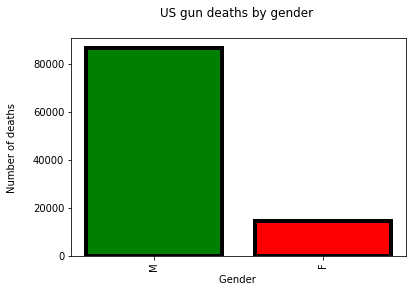

In [249]:
#tick_label does the some work as plt.xticks()
plt.bar(range(len(sex_counts)),values_sex , 
        tick_label=names_sex,  align='center', color=('green', 'red'),
        edgecolor='black', linewidth=4)
plt.xticks(rotation=90)
plt.title("US gun deaths by gender \n")
plt.xlabel("Gender \n")
plt.ylabel("Number of deaths \n")
plt.show()      



More males than females are killed by guns. 
Social support actions tailored to males could be justified.

['Asian/Pacific Islander', 'White', 'Native American/Native Alaskan', 'Black', 'Hispanic']
range(0, 5)


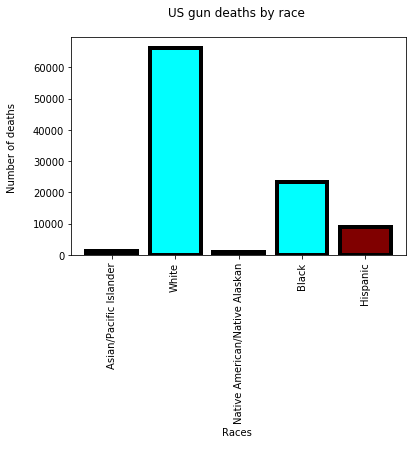

In [250]:
name_race=list(race_counts.keys())
print(name_race)
values_race=race_counts.values()
length_race=range(len(race_counts))
print(length_race)

plt.bar(name_race, values_race, tick_label=name_race, 
        align="center", edgecolor='black', linewidth=4, color=['maroon', 'cyan'])
plt.xticks(rotation=90)
plt.title("US gun deaths by race \n")
plt.xlabel("Races \n")
plt.ylabel("Number of deaths \n")

plt.show()

## Matching type of gun deaths with census data

The census data allows to understand the ethnic origin of gun deaths.

In [251]:
# loading census data with python core
f = open("census.csv", "r")
csvfile = csv.reader(f)
censusdata = list(csvfile)
print(censusdata)

[['Id', 'Year', 'Id', 'Sex', 'Id', 'Hispanic Origin', 'Id', 'Id2', 'Geography', 'Total', 'Race Alone - White', 'Race Alone - Hispanic', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races'], ['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]


In [252]:
mapping = {}

print(race_counts.keys())

censusdata_white = [ i[10] for i in censusdata]
censusdata_white=int(censusdata_white[1])
print(censusdata_white)
censusdata_hispanic = [ i[11] for i in censusdata]
censusdata_hispanic=int(censusdata_hispanic[1])
print(censusdata_hispanic)
censusdata_black = [ i[12] for i in censusdata]
censusdata_black=int(censusdata_black[1])
print(censusdata_black)
censusdata_native = [ i[13] for i in censusdata]
censusdata_native=int(censusdata_native[1])
print(censusdata_native)
censusdata_asian = [i[14] for i in censusdata]
censusdata_asian=int(censusdata_asian[1])
print(censusdata_asian)
censusdata_hawai = [i[15] for i in censusdata]
censusdata_hawai=int(censusdata_hawai[1])
print(censusdata_hawai)
asian_hawai = censusdata_hawai + censusdata_asian
print(asian_hawai)

mapping['White'] = censusdata_white
mapping['Asian/Pacific Islander'] = asian_hawai
mapping[ 'Black'] = censusdata_black 
mapping['Native American/Native Alaskan'] = censusdata_native
mapping['Hispanic'] = censusdata_hispanic
print(mapping)



dict_keys(['Asian/Pacific Islander', 'White', 'Native American/Native Alaskan', 'Black', 'Hispanic'])
197318956
44618105
40250635
3739506
15159516
674625
15834141
{'White': 197318956, 'Asian/Pacific Islander': 15834141, 'Black': 40250635, 'Native American/Native Alaskan': 3739506, 'Hispanic': 44618105}


#### Have some ethnics groups unproportional higher gun deaths than other groups?

In [253]:

race_per_hundredk={}
for i,v in race_counts.items():
    for u,b in mapping.items():
        if i == u:
            rr=v/b*100000
            race_per_hundredk[i]=round(rr,2)
    
print(race_per_hundredk)



{'Asian/Pacific Islander': 8.37, 'White': 33.57, 'Native American/Native Alaskan': 24.52, 'Black': 57.88, 'Hispanic': 20.22}


In [254]:

from matplotlib import pyplot as plt
%matplotlib inline

names = list(race_per_hundredk.keys())
print(names)
values = list(race_per_hundredk.values())

    

['Asian/Pacific Islander', 'White', 'Native American/Native Alaskan', 'Black', 'Hispanic']


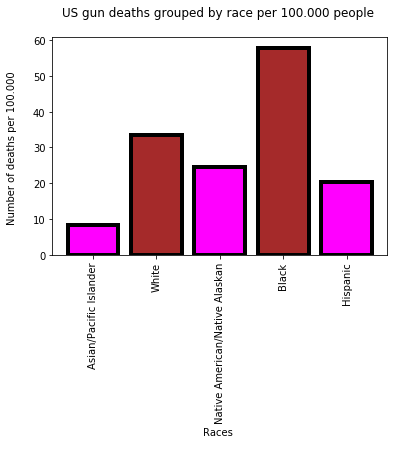

In [255]:

#tick_label does the some work as plt.xticks()
plt.bar(range(len(race_per_hundredk)), values, tick_label=names, 
        align='center', color=('magenta', "brown"), edgecolor='black',
        linewidth=4)
plt.xticks(rotation=90)
plt.title("US gun deaths grouped by race per 100.000 people \n")
plt.xlabel("Races \n")
plt.ylabel("Number of deaths per 100.000 \n")
plt.show()


The ethnic group 'black' have unproportional higher number of gun deaths.
Social politics could address this with support programs to reduce the numbers
within a time frame.

## Death types

In [256]:
print(data[:5])

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [257]:

intents = [ i[3] for i in data]

print("Intents: {}".format(intents[:20]))
print("Length of intents: {}".format(len(intents)))

intent_enumerate_list =[]
for i,value in enumerate(intents):
    intent_enumerate_list.append((i,value))
print(intent_enumerate_list[:10])

Intents: ['Suicide', 'Suicide', 'Suicide', 'Suicide', 'Suicide', 'Suicide', 'Undetermined', 'Suicide', 'Accidental', 'Suicide', 'Suicide', 'Suicide', 'Suicide', 'Suicide', 'Homicide', 'Suicide', 'Suicide', 'Suicide', 'Homicide', 'Suicide']
Length of intents: 100798
[(0, 'Suicide'), (1, 'Suicide'), (2, 'Suicide'), (3, 'Suicide'), (4, 'Suicide'), (5, 'Suicide'), (6, 'Undetermined'), (7, 'Suicide'), (8, 'Accidental'), (9, 'Suicide')]


In [258]:
print("DATA: {}".format(data[0]))

DATA: ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4']


In [259]:
count_death_types = {}

for i in intents:
    if i in count_death_types.keys():
        count_death_types[i] += 1
    else:
        count_death_types[i] = 1

print("Count Death Types: {}".format(count_death_types))


names_count_death_types = list(count_death_types.keys())
values_count_death_types = count_death_types.values()
range_count_death_types = range(len(count_death_types))



Count Death Types: {'Suicide': 63175, 'Undetermined': 807, 'Accidental': 1639, 'Homicide': 35176, 'NA': 1}


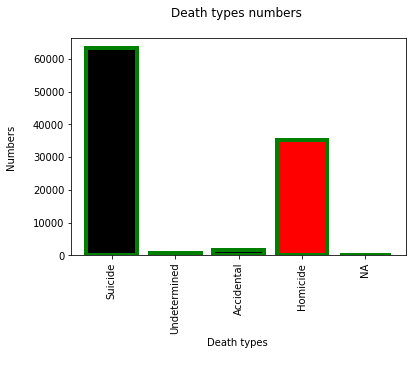

In [260]:
plt.bar(range_count_death_types, values_count_death_types, 
        tick_label=names_count_death_types , align="center" , 
        color=("black", "red"), linewidth=4, edgecolor='green')
plt.title("Death types numbers \n")
plt.xlabel("Death types \n")
plt.ylabel("Numbers \n")
plt.xticks(rotation=90)
plt.show()


5


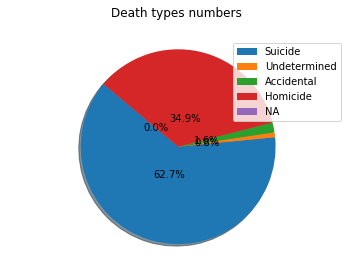

In [261]:

print(len(list(values_count_death_types)))

plt.pie(list(values_count_death_types),  autopct='%1.1f%%', 
        shadow=True, startangle=140, 
        pctdistance= 0.3, labeldistance=1.4)
plt.title("Death types numbers \n")
plt.legend(names_count_death_types , loc=1)
plt.axis('equal')

plt.show()

## Homicides

In [262]:

homicides= 0
for i in intents:
    if i == 'Homicide':
        homicides += 1
print("Number of homicides: {}".format(homicides))

Number of homicides: 35176


In [263]:
races_2=[ i[7]  for i in data]

print("Races: {}".format(races_2[:10]))
print("Count races_2: {}".format(len(races_2)))
print("Count intents: {}".format(len(intents)))



Races: ['Asian/Pacific Islander', 'White', 'White', 'White', 'White', 'Native American/Native Alaskan', 'White', 'Native American/Native Alaskan', 'White', 'Black']
Count races_2: 100798
Count intents: 100798


In [264]:
import matplotlib

hexcolors = []

for name, hex in matplotlib.colors.cnames.items():
    # print(name, hex)
    hexcolors.append([name, hex])
    
print(hexcolors[:10])

[['aliceblue', '#F0F8FF'], ['antiquewhite', '#FAEBD7'], ['aqua', '#00FFFF'], ['aquamarine', '#7FFFD4'], ['azure', '#F0FFFF'], ['beige', '#F5F5DC'], ['bisque', '#FFE4C4'], ['black', '#000000'], ['blanchedalmond', '#FFEBCD'], ['blue', '#0000FF']]


In [265]:

homicide_race_counts = {}


for e,race in enumerate(races_2):
    if intents[e] == "Homicide":
        if race in homicide_race_counts.keys():
            homicide_race_counts[race]+=1
        else:
            homicide_race_counts[race]=1

print(homicide_race_counts)




{'White': 9147, 'Asian/Pacific Islander': 559, 'Black': 19510, 'Native American/Native Alaskan': 326, 'Hispanic': 5634}


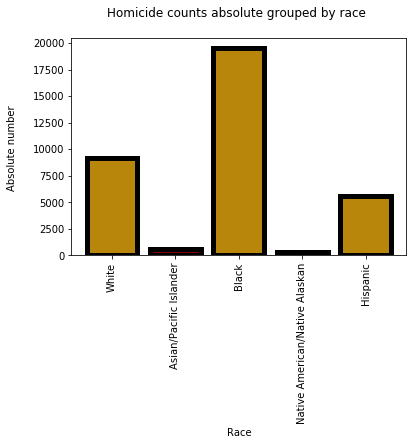

In [266]:
homicide_race_counts_name = list(homicide_race_counts.keys())
homicide_race_counts_values = homicide_race_counts.values()
homicide_race_counts_range = range(len(homicide_race_counts))

plt.bar(homicide_race_counts_range, homicide_race_counts_values, 
        tick_label=homicide_race_counts_name, align='center',
       color=('darkgoldenrod', 'maroon'), edgecolor='black',
       linewidth=5)
plt.xticks(rotation=90)
plt.title('Homicide counts absolute grouped by race \n')
plt.xlabel('Race')
plt.ylabel('Absolute number \n')
plt.show()

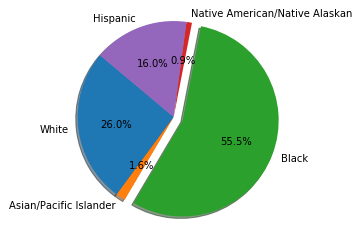

In [267]:
explode =  (0, 0, 0.1, 0, 0)
plt.pie(list(homicide_race_counts_values ), labels=homicide_race_counts_name,  autopct='%1.1f%%', 
        shadow=True, startangle=140, explode=explode)
plt.axis('equal')

plt.show()

#### Have some ethnics groups unproportional higher homicide rates than other groups?

In [268]:
print(mapping)
print(homicide_race_counts)

{'White': 197318956, 'Asian/Pacific Islander': 15834141, 'Black': 40250635, 'Native American/Native Alaskan': 3739506, 'Hispanic': 44618105}
{'White': 9147, 'Asian/Pacific Islander': 559, 'Black': 19510, 'Native American/Native Alaskan': 326, 'Hispanic': 5634}


In [269]:
homicide_race_counts_per_hundredk={}

for i,v in homicide_race_counts.items():
    for u,b in mapping.items():
        if i == u:
            rr=v/b*100000
            homicide_race_counts_per_hundredk[i]=round(rr,2)
    
print(homicide_race_counts_per_hundredk)

{'White': 4.64, 'Asian/Pacific Islander': 3.53, 'Black': 48.47, 'Native American/Native Alaskan': 8.72, 'Hispanic': 12.63}


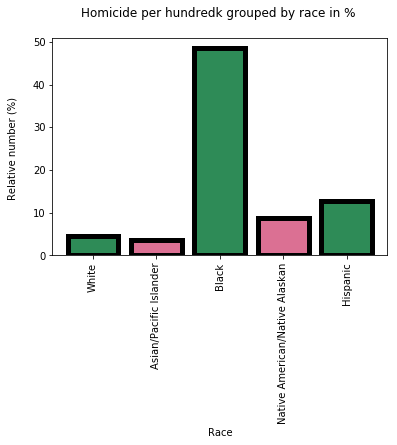

In [270]:
homicide_race_counts_per_hundredk_name = \
list(homicide_race_counts_per_hundredk.keys())
homicide_race_counts_per_hundredk_values = homicide_race_counts_per_hundredk.values()
homicide_race_counts_per_hundredk_range = range(len(homicide_race_counts_per_hundredk))

plt.bar(homicide_race_counts_per_hundredk_range, homicide_race_counts_per_hundredk_values, 
        tick_label=homicide_race_counts_per_hundredk_name , align='center',
       color=('seagreen', 'palevioletred'), edgecolor='black', linewidth=5)
plt.xticks(rotation=90)
plt.title('Homicide per hundredk grouped by race in % \n')
plt.xlabel('Race')
plt.ylabel('Relative number (%) \n')
plt.show()

#### Using Pandas

In [271]:
import matplotlib

hexcolors = []

for name, hex in matplotlib.colors.cnames.items():
    # print(name, hex)
    hexcolors.append([name, hex])
    
print(hexcolors[:10])

[['aliceblue', '#F0F8FF'], ['antiquewhite', '#FAEBD7'], ['aqua', '#00FFFF'], ['aquamarine', '#7FFFD4'], ['azure', '#F0FFFF'], ['beige', '#F5F5DC'], ['bisque', '#FFE4C4'], ['black', '#000000'], ['blanchedalmond', '#FFEBCD'], ['blue', '#0000FF']]


In [272]:
print(headers)

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']


In [273]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [274]:
df=pd.DataFrame(data, columns=headers)
print(df.head())
print(df.tail())
print(df.describe())

      year month   intent police sex age                    race hispanic  \
0  1  2012    01  Suicide      0   M  34  Asian/Pacific Islander      100   
1  2  2012    01  Suicide      0   F  21                   White      100   
2  3  2012    01  Suicide      0   M  60                   White      100   
3  4  2012    02  Suicide      0   M  64                   White      100   
4  5  2012    02  Suicide      0   M  31                   White      100   

             place education  
0             Home         4  
1           Street         3  
2  Other specified         4  
3             Home         4  
4  Other specified         2  
                year month    intent police sex age      race hispanic  \
100793  100794  2014    12  Homicide      0   M  36     Black      100   
100794  100795  2014    12  Homicide      0   M  19     Black      100   
100795  100796  2014    12  Homicide      0   M  20     Black      100   
100796  100797  2014    12  Homicide      0   M  22  Hi

In [275]:
df_itent_race=df.iloc[:,[3,7]]



In [276]:
print(df_itent_race.head())

    intent                    race
0  Suicide  Asian/Pacific Islander
1  Suicide                   White
2  Suicide                   White
3  Suicide                   White
4  Suicide                   White


#### Selecting deaths caused by suicides

In [277]:

df_itent_race_2 = []
for i, row in df_itent_race.iterrows():
    if df_itent_race.loc[i, 'intent'] == "Homicide":
        
        df_itent_race_2.append(1) 

    else:
        
        df_itent_race_2.append(0) 
    
    

In [278]:
print(type(df_itent_race_2))
print(len(df_itent_race_2))
print(df_itent_race_2[5000:5005])

<class 'list'>
100798
[1, 1, 0, 1, 0]


#### Make a dummy column indicating if death is caused by suicide

In [288]:
# df_itent_race.is_copy = False
df_itent_race.loc[:,"Dummy"] = df_itent_race_2


In [280]:
print(df_itent_race[:50])  

          intent                            race  Dummy
0        Suicide          Asian/Pacific Islander      0
1        Suicide                           White      0
2        Suicide                           White      0
3        Suicide                           White      0
4        Suicide                           White      0
5        Suicide  Native American/Native Alaskan      0
6   Undetermined                           White      0
7        Suicide  Native American/Native Alaskan      0
8     Accidental                           White      0
9        Suicide                           Black      0
10       Suicide                           White      0
11       Suicide  Native American/Native Alaskan      0
12       Suicide                           White      0
13       Suicide  Native American/Native Alaskan      0
14      Homicide                           White      1
15       Suicide  Native American/Native Alaskan      0
16       Suicide                           White